In [41]:
import sys
sys.path.append("./code/")
from thinkbayes import Suite, Pmf
import thinkplot
import thinkbayes

In [42]:
class Euro(Suite):
    def Likelihood(self, data, hypo):
        x = hypo / 100
        
        if data == 'H':
            return x
        else:
            return 1 - x            

In [56]:
def PlotSuites(suites, root):
    """Plots two suites.

    suite1, suite2: Suite objects
    root: string filename to write
    """
    thinkplot.Clf()
    thinkplot.PrePlot(len(suites))
    
    # thinkplot.Cdfs(suites)
    thinkplot.Pmfs(suites)

    thinkplot.Show(root=root,
                   xlabel='x',
                   ylabel='Probability',
                   formats=['pdf', 'eps'])

C:\Users\inwoo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


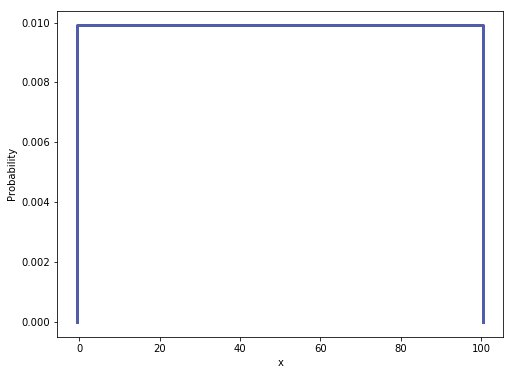

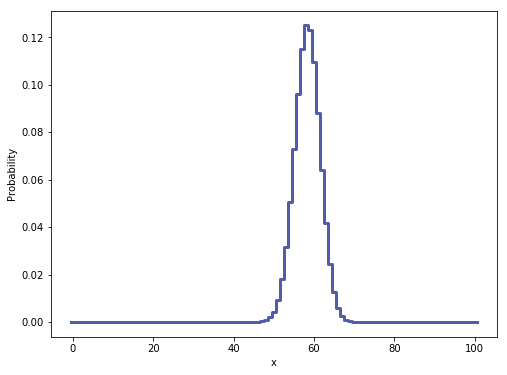

In [57]:
suite = Euro(range(0, 101))
dataset = 'H' * 140 + 'T' * 100

PlotSuites([suite], 'euro_before')

for data in dataset:
    suite.Update(data)

# save plot to pdf
PlotSuites([suite], 'euro_after')

In [59]:
print("Mean: %f" % suite.Mean())
print("Median: %f" % thinkbayes.Percentile(suite, 50))
print("Credible from %d ~ %d" % thinkbayes.CredibleInterval(suite, 90))

Mean: 58.264463
Median: 58.000000
Credible from 53 ~ 63


In [64]:
class Beta(object):
    def __init__(self, alpha=1, beta=1):
        self.alpha = alpha
        self.beta = beta
        
    def Update(self, data):
        heads, tails = data
        self.alpha += heads
        self.beta += tails
        
    def Mean(self):
        return self.alpha / (self.alpha + self.beta)
        
# beta = thinkbayes.Beta()
beta = Beta()
beta.Update((140, 110))
print(beta.Mean())

0.5595238095238095
